In [82]:
## 10-805 Machine Learning with Large Dataset  Final Project
## Yelp Challenge
## Code snippet :  Connecting to remote sql server using python
## Date : Oct. 22nd 2017
## Name : Jingyu Wang

## Assumption : Please install mysql connector on your macs

import mysql.connector
from mysql.connector import errorcode
import datetime
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 
from nltk.corpus import stopwords
import string
import csv

# step 1 : connect to the remote MySQL server
try:
    cnx = mysql.connector.connect(user='Admin10805', password='10805fall2017',
                          host='yelp2.csfuygoxtob2.us-east-2.rds.amazonaws.com',
                          database='yelp_db')
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
print("connected")
# else:
#   cnx.close()


connected


In [21]:
#Extract word combination from the review dataset
#Up to distance D = 5. If two words in the review are not more than D apart, the combination will be considered
#The output will be stored in a csv file where each line is all possible word combination for each review
cursor = cnx.cursor()
query = ("SELECT id,text FROM review_token")
cursor.execute(query) 
results = cursor.fetchall()
print("Query done")

Query done


In [22]:
def add_to_dict(d,k):
    if d.has_key(k):
        d[k] += 1
    else:
        d[k] = 1
    

In [23]:
#clean up the txt file
D = 6
dist = [i for i in range(2,D+1)] 
for d in dist:
    filename = "_".join(['review_word_comb_distance',str(d)])
    with open(filename,'w') as f:
        pass


In [25]:
D = 6 #up to distance 5
total_data = len(results)
dist = [i for i in range(2,D+1)] 
feature_dict = [dict() for x in range(D)] #Initialize D dictionary for storing all possible feature 
print("Total reviews: ",len(results))
num = 0
for row in results:
    num += 1
    if num%10000 == 0:
        print("".join([str(num),"/",str(len(results)), "reviews processed"]))
    #Clean up the dictionary every 50,000 examples
    #If the word combination only show up once after 50,000 examples, it is very unlikely that this combination will show up again later. 
    #Therefore, the combination will be thrown out anyways
    if num % 10000 == 0:
        print("Cleaning up dictionary ")
        for d in dist:
            print("Size of dictionary ",str(d-2)," ",str(len(feature_dict[d-2])))
            for k,v in feature_dict[d-2].items():
                if v <= 2:
                    del feature_dict[d-2][k]

    try:
        row_text = row[1]
        row_tokens = word_tokenize(row_text)
        review_len = len(row_tokens)
        for d in dist:
            to_write = []
            for i in range(review_len):
                if i+d < review_len:
                    comb = '+'.join([row_tokens[i],row_tokens[i+d]]).encode('utf-8').strip()
                    #Update the count in the dictionary
                    add_to_dict(feature_dict[d-2],comb)

                    to_write.append(comb)
            #Write all combinations up to d distance to file
            filename = "_".join(['review_word_comb_distance',str(d)])
            with open(filename,'a') as f:
                writer=csv.writer(f, delimiter='\t',lineterminator='\n',)
                writer.writerow(to_write)
    except:
        print("problem ecountered at row ",num)
        print(row)

print("Done extracting word combinations")
#12:01

('Total reviews: ', 4736825)
10000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '412498')
('Size of dictionary ', '1', ' ', '418905')
('Size of dictionary ', '2', ' ', '416982')
('Size of dictionary ', '3', ' ', '413208')
('Size of dictionary ', '4', ' ', '408907')
20000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '416859')
('Size of dictionary ', '1', ' ', '422881')
('Size of dictionary ', '2', ' ', '420911')
('Size of dictionary ', '3', ' ', '417299')
('Size of dictionary ', '4', ' ', '412330')
30000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '421517')
('Size of dictionary ', '1', ' ', '427988')
('Size of dictionary ', '2', ' ', '426316')
('Size of dictionary ', '3', ' ', '421946')
('Size of dictionary ', '4', ' ', '417182')
40000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '423939')
('Size of dictionary ', '1', ' ', '429606')
('S

('Size of dictionary ', '3', ' ', '463724')
('Size of dictionary ', '4', ' ', '458199')
310000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '472329')
('Size of dictionary ', '1', ' ', '477321')
('Size of dictionary ', '2', ' ', '474387')
('Size of dictionary ', '3', ' ', '469352')
('Size of dictionary ', '4', ' ', '463216')
320000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '479561')
('Size of dictionary ', '1', ' ', '483505')
('Size of dictionary ', '2', ' ', '480348')
('Size of dictionary ', '3', ' ', '475515')
('Size of dictionary ', '4', ' ', '469689')
330000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '483506')
('Size of dictionary ', '1', ' ', '487537')
('Size of dictionary ', '2', ' ', '484667')
('Size of dictionary ', '3', ' ', '479138')
('Size of dictionary ', '4', ' ', '473588')
340000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0',

('Size of dictionary ', '2', ' ', '511010')
('Size of dictionary ', '3', ' ', '505159')
('Size of dictionary ', '4', ' ', '499443')
610000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '507921')
('Size of dictionary ', '1', ' ', '510891')
('Size of dictionary ', '2', ' ', '507104')
('Size of dictionary ', '3', ' ', '501856')
('Size of dictionary ', '4', ' ', '495813')
620000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '512473')
('Size of dictionary ', '1', ' ', '515661')
('Size of dictionary ', '2', ' ', '511991')
('Size of dictionary ', '3', ' ', '505694')
('Size of dictionary ', '4', ' ', '499523')
630000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '505043')
('Size of dictionary ', '1', ' ', '507745')
('Size of dictionary ', '2', ' ', '503977')
('Size of dictionary ', '3', ' ', '498489')
('Size of dictionary ', '4', ' ', '492016')
640000/4736825reviews processed
Cleaning

('Size of dictionary ', '1', ' ', '541809')
('Size of dictionary ', '2', ' ', '537337')
('Size of dictionary ', '3', ' ', '531241')
('Size of dictionary ', '4', ' ', '525164')
910000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '536174')
('Size of dictionary ', '1', ' ', '537928')
('Size of dictionary ', '2', ' ', '533160')
('Size of dictionary ', '3', ' ', '527091')
('Size of dictionary ', '4', ' ', '520777')
920000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '536515')
('Size of dictionary ', '1', ' ', '538722')
('Size of dictionary ', '2', ' ', '534147')
('Size of dictionary ', '3', ' ', '528277')
('Size of dictionary ', '4', ' ', '521821')
930000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '540654')
('Size of dictionary ', '1', ' ', '542328')
('Size of dictionary ', '2', ' ', '537680')
('Size of dictionary ', '3', ' ', '531613')
('Size of dictionary ', '4', ' ', '52524

1200000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '559042')
('Size of dictionary ', '1', ' ', '560049')
('Size of dictionary ', '2', ' ', '555039')
('Size of dictionary ', '3', ' ', '548617')
('Size of dictionary ', '4', ' ', '541547')
1210000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '561322')
('Size of dictionary ', '1', ' ', '561362')
('Size of dictionary ', '2', ' ', '556277')
('Size of dictionary ', '3', ' ', '550591')
('Size of dictionary ', '4', ' ', '543998')
1220000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '554757')
('Size of dictionary ', '1', ' ', '555607')
('Size of dictionary ', '2', ' ', '550086')
('Size of dictionary ', '3', ' ', '544000')
('Size of dictionary ', '4', ' ', '536611')
1230000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '557643')
('Size of dictionary ', '1', ' ', '558353')
('Size of dictionary ', 

('Size of dictionary ', '3', ' ', '566487')
('Size of dictionary ', '4', ' ', '559410')
1500000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '583811')
('Size of dictionary ', '1', ' ', '583950')
('Size of dictionary ', '2', ' ', '578013')
('Size of dictionary ', '3', ' ', '572065')
('Size of dictionary ', '4', ' ', '564800')
1510000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '573241')
('Size of dictionary ', '1', ' ', '572490')
('Size of dictionary ', '2', ' ', '567037')
('Size of dictionary ', '3', ' ', '560612')
('Size of dictionary ', '4', ' ', '553385')
1520000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '574935')
('Size of dictionary ', '1', ' ', '574395')
('Size of dictionary ', '2', ' ', '568576')
('Size of dictionary ', '3', ' ', '562892')
('Size of dictionary ', '4', ' ', '555371')
1530000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', 

('Size of dictionary ', '1', ' ', '587835')
('Size of dictionary ', '2', ' ', '581343')
('Size of dictionary ', '3', ' ', '575017')
('Size of dictionary ', '4', ' ', '567953')
1800000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '588169')
('Size of dictionary ', '1', ' ', '586915')
('Size of dictionary ', '2', ' ', '580238')
('Size of dictionary ', '3', ' ', '573651')
('Size of dictionary ', '4', ' ', '566500')
1810000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '587957')
('Size of dictionary ', '1', ' ', '586177')
('Size of dictionary ', '2', ' ', '579561')
('Size of dictionary ', '3', ' ', '572956')
('Size of dictionary ', '4', ' ', '565938')
1820000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '587688')
('Size of dictionary ', '1', ' ', '586031')
('Size of dictionary ', '2', ' ', '579178')
('Size of dictionary ', '3', ' ', '573025')
('Size of dictionary ', '4', ' ', '56

2090000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '601169')
('Size of dictionary ', '1', ' ', '598310')
('Size of dictionary ', '2', ' ', '591535')
('Size of dictionary ', '3', ' ', '584340')
('Size of dictionary ', '4', ' ', '577029')
2100000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '601521')
('Size of dictionary ', '1', ' ', '598807')
('Size of dictionary ', '2', ' ', '591933')
('Size of dictionary ', '3', ' ', '584697')
('Size of dictionary ', '4', ' ', '578116')
2110000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '609045')
('Size of dictionary ', '1', ' ', '606875')
('Size of dictionary ', '2', ' ', '599620')
('Size of dictionary ', '3', ' ', '592912')
('Size of dictionary ', '4', ' ', '586282')
2120000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '607392')
('Size of dictionary ', '1', ' ', '604611')
('Size of dictionary ', 

('Size of dictionary ', '3', ' ', '599476')
('Size of dictionary ', '4', ' ', '592716')
2390000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '622138')
('Size of dictionary ', '1', ' ', '618859')
('Size of dictionary ', '2', ' ', '611091')
('Size of dictionary ', '3', ' ', '604212')
('Size of dictionary ', '4', ' ', '597223')
2400000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '622897')
('Size of dictionary ', '1', ' ', '619064')
('Size of dictionary ', '2', ' ', '611410')
('Size of dictionary ', '3', ' ', '604702')
('Size of dictionary ', '4', ' ', '597530')
2410000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '616319')
('Size of dictionary ', '1', ' ', '612518')
('Size of dictionary ', '2', ' ', '605493')
('Size of dictionary ', '3', ' ', '597644')
('Size of dictionary ', '4', ' ', '590502')
2420000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', 

('Size of dictionary ', '1', ' ', '623933')
('Size of dictionary ', '2', ' ', '616743')
('Size of dictionary ', '3', ' ', '609246')
('Size of dictionary ', '4', ' ', '601378')
2690000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '632993')
('Size of dictionary ', '1', ' ', '628668')
('Size of dictionary ', '2', ' ', '621234')
('Size of dictionary ', '3', ' ', '613573')
('Size of dictionary ', '4', ' ', '605647')
2700000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '632333')
('Size of dictionary ', '1', ' ', '627487')
('Size of dictionary ', '2', ' ', '619832')
('Size of dictionary ', '3', ' ', '612456')
('Size of dictionary ', '4', ' ', '604901')
2710000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '630934')
('Size of dictionary ', '1', ' ', '626523')
('Size of dictionary ', '2', ' ', '618669')
('Size of dictionary ', '3', ' ', '611458')
('Size of dictionary ', '4', ' ', '60

2980000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '642721')
('Size of dictionary ', '1', ' ', '637661')
('Size of dictionary ', '2', ' ', '629614')
('Size of dictionary ', '3', ' ', '621839')
('Size of dictionary ', '4', ' ', '614605')
2990000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '645397')
('Size of dictionary ', '1', ' ', '640693')
('Size of dictionary ', '2', ' ', '632505')
('Size of dictionary ', '3', ' ', '625022')
('Size of dictionary ', '4', ' ', '617373')
3000000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '646236')
('Size of dictionary ', '1', ' ', '641267')
('Size of dictionary ', '2', ' ', '633257')
('Size of dictionary ', '3', ' ', '626364')
('Size of dictionary ', '4', ' ', '618487')
3010000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '642859')
('Size of dictionary ', '1', ' ', '637170')
('Size of dictionary ', 

('Size of dictionary ', '3', ' ', '632188')
('Size of dictionary ', '4', ' ', '624573')
3280000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '651442')
('Size of dictionary ', '1', ' ', '645012')
('Size of dictionary ', '2', ' ', '636848')
('Size of dictionary ', '3', ' ', '629236')
('Size of dictionary ', '4', ' ', '621348')
3290000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '657165')
('Size of dictionary ', '1', ' ', '650903')
('Size of dictionary ', '2', ' ', '643128')
('Size of dictionary ', '3', ' ', '635120')
('Size of dictionary ', '4', ' ', '627713')
3300000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '654394')
('Size of dictionary ', '1', ' ', '648591')
('Size of dictionary ', '2', ' ', '639988')
('Size of dictionary ', '3', ' ', '632192')
('Size of dictionary ', '4', ' ', '624427')
3310000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', 

('Size of dictionary ', '1', ' ', '657996')
('Size of dictionary ', '2', ' ', '649256')
('Size of dictionary ', '3', ' ', '640941')
('Size of dictionary ', '4', ' ', '633782')
3580000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '663027')
('Size of dictionary ', '1', ' ', '656176')
('Size of dictionary ', '2', ' ', '647736')
('Size of dictionary ', '3', ' ', '639579')
('Size of dictionary ', '4', ' ', '632228')
3590000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '666633')
('Size of dictionary ', '1', ' ', '659810')
('Size of dictionary ', '2', ' ', '651040')
('Size of dictionary ', '3', ' ', '643117')
('Size of dictionary ', '4', ' ', '635875')
3600000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '662241')
('Size of dictionary ', '1', ' ', '654647')
('Size of dictionary ', '2', ' ', '645631')
('Size of dictionary ', '3', ' ', '637791')
('Size of dictionary ', '4', ' ', '63

3870000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '671877')
('Size of dictionary ', '1', ' ', '664000')
('Size of dictionary ', '2', ' ', '655898')
('Size of dictionary ', '3', ' ', '647318')
('Size of dictionary ', '4', ' ', '639684')
3880000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '675960')
('Size of dictionary ', '1', ' ', '667583')
('Size of dictionary ', '2', ' ', '658646')
('Size of dictionary ', '3', ' ', '650982')
('Size of dictionary ', '4', ' ', '642751')
3890000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '671153')
('Size of dictionary ', '1', ' ', '662789')
('Size of dictionary ', '2', ' ', '654302')
('Size of dictionary ', '3', ' ', '646109')
('Size of dictionary ', '4', ' ', '638163')
3900000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '671331')
('Size of dictionary ', '1', ' ', '663417')
('Size of dictionary ', 

('Size of dictionary ', '3', ' ', '658043')
('Size of dictionary ', '4', ' ', '650494')
4170000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '684669')
('Size of dictionary ', '1', ' ', '676724')
('Size of dictionary ', '2', ' ', '667331')
('Size of dictionary ', '3', ' ', '658883')
('Size of dictionary ', '4', ' ', '650950')
4180000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '685654')
('Size of dictionary ', '1', ' ', '677301')
('Size of dictionary ', '2', ' ', '667807')
('Size of dictionary ', '3', ' ', '659769')
('Size of dictionary ', '4', ' ', '651689')
4190000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '681093')
('Size of dictionary ', '1', ' ', '672037')
('Size of dictionary ', '2', ' ', '662917')
('Size of dictionary ', '3', ' ', '654294')
('Size of dictionary ', '4', ' ', '646236')
4200000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', 

('Size of dictionary ', '1', ' ', '682398')
('Size of dictionary ', '2', ' ', '672767')
('Size of dictionary ', '3', ' ', '663969')
('Size of dictionary ', '4', ' ', '655841')
4470000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '694190')
('Size of dictionary ', '1', ' ', '684866')
('Size of dictionary ', '2', ' ', '675321')
('Size of dictionary ', '3', ' ', '667050')
('Size of dictionary ', '4', ' ', '658792')
4480000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '693180')
('Size of dictionary ', '1', ' ', '684108')
('Size of dictionary ', '2', ' ', '674280')
('Size of dictionary ', '3', ' ', '665599')
('Size of dictionary ', '4', ' ', '657902')
4490000/4736825reviews processed
Cleaning up dictionary 
('Size of dictionary ', '0', ' ', '688378')
('Size of dictionary ', '1', ' ', '678708')
('Size of dictionary ', '2', ' ', '668815')
('Size of dictionary ', '3', ' ', '660102')
('Size of dictionary ', '4', ' ', '65

In [26]:
#Write the dictionary to txt file
import json
for d in range(len(dist)):
    filename = "_".join([str(d+1),"word_comb_dict.txt"])
    json.dump(feature_dict[d],open(filename,'w'))
        

In [81]:
#Check the frequency distribution of each word combination
import operator
# for d in range(len(dist)):
#     for k,v in feature_dict[d].iteritems():
#         if v > 30000:
#             print k

freq = sorted(feature_dict[4].values(),reverse=True)
idx = (int)(len(freq)*0.2)
freq = freq[0:idx]
print(len(freq))
print(idx)
print(freq)

115976
115976
[398934, 67511, 61052, 60762, 60609, 59392, 57538, 55614, 55320, 53170, 53047, 51129, 48645, 46887, 46271, 45005, 42685, 42450, 41822, 41615, 39589, 39148, 38728, 38595, 37979, 37843, 37505, 36860, 36839, 36186, 35450, 34866, 34130, 34001, 33907, 33610, 33294, 32836, 32793, 32631, 32271, 31614, 31114, 31097, 30662, 30554, 30272, 30263, 29969, 29806, 29607, 29296, 29175, 28355, 28327, 28230, 27660, 27446, 27312, 27121, 27111, 27067, 26979, 26850, 26836, 26616, 26427, 26228, 25902, 25616, 25431, 25329, 25027, 25026, 24911, 24733, 24666, 24566, 23627, 23597, 23467, 23255, 23134, 23126, 23052, 23032, 22941, 22896, 22730, 22476, 22475, 22232, 22206, 22205, 22185, 22021, 21866, 21825, 21576, 21519, 21449, 21417, 21333, 21242, 20968, 20941, 20706, 20686, 20682, 20519, 20503, 20476, 20469, 20404, 20274, 20190, 20190, 20137, 19996, 19836, 19691, 19504, 19500, 19401, 19254, 19170, 19147, 19044, 18983, 18982, 18980, 18888, 18882, 18806, 18782, 18633, 18629, 18613, 18551, 18456, 1844

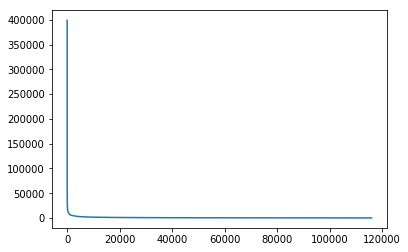

In [143]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
plt.plot(freq[0:idx])
plt.show()

In [30]:
print(feature_dict[2])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


123590


27111
1000
2000
3000
4000
5000
6000
7000


KeyboardInterrupt: 